In [10]:
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd
import webrtcvad
vad = webrtcvad.Vad()

%matplotlib inline

In [11]:
train_audio_path = './train/audio/'
filename = '/yes/0a7c2a8d_nohash_0.wav'
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)

In [12]:
# Define a function that calculates spectrogram.
# Frequencies are in range (0, 8000) according to Nyquist theorem.

def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

/home/rainbowww5/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



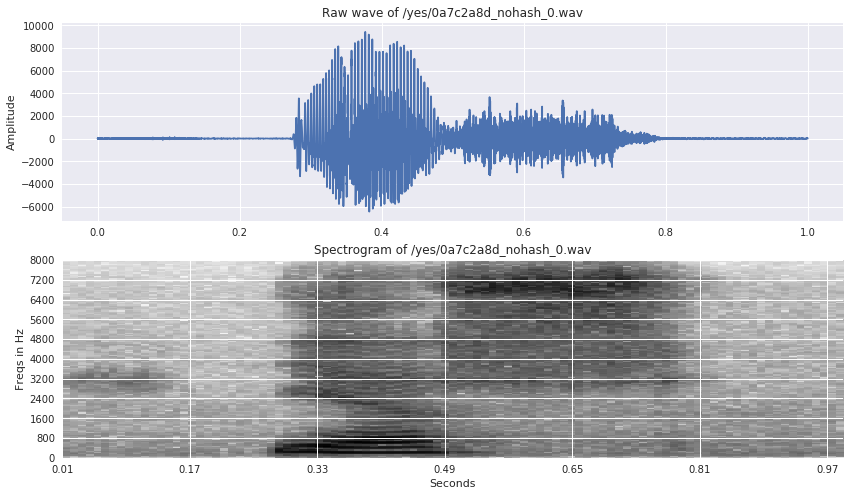

In [6]:
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

/home/rainbowww5/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



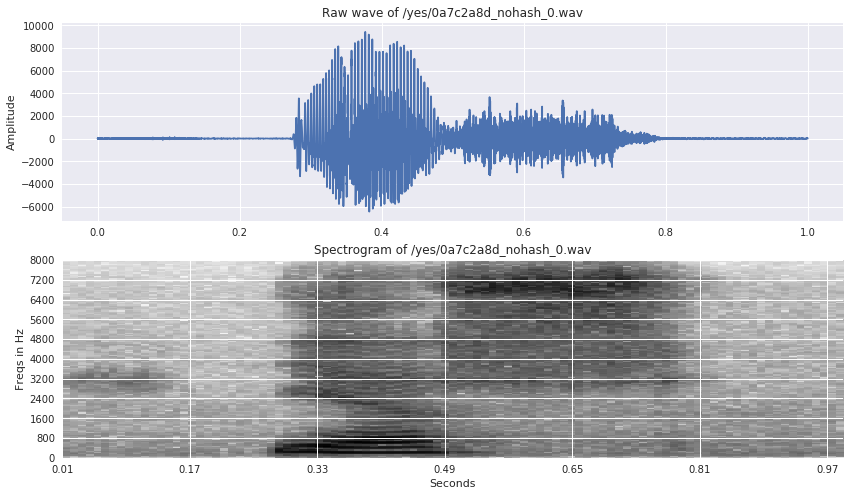

In [13]:
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [7]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)
spectrogram = (spectrogram - mean) / std

array([ -6.44541216,  -2.68605757,  -0.17020437,   1.34362257,
         1.69632792,   1.50504768,   0.12262072,   0.03812617,
        -0.04474315,   0.16225672,  -0.07798791,   0.27368367,
        -0.026014  ,   0.2441691 ,  -0.12742953,  -0.7578699 ,
        -0.89948291,  -0.94874567,  -1.18539846,  -1.43317187,
        -1.76032794,  -2.28475618,  -2.58000016,  -3.0245533 ,
        -3.15255809,  -3.47861433,  -3.67909908,  -3.63961577,
        -3.30736327,  -3.11520982,  -3.18921924,  -3.29727459,
        -3.1491828 ,  -2.96080303,  -2.71859813,  -2.59193397,
        -2.67951417,  -2.94725418,  -3.15388322,  -3.04311609,
        -3.16750813,  -3.45041823,  -3.58386016,  -3.02953553,
        -2.99128079,  -3.362535  ,  -3.25014281,  -3.51702356,
        -3.37008786,  -3.23475099,  -3.01500225,  -2.88347578,
        -2.82789278,  -2.62466359,  -2.00253677,  -2.00467849,
        -1.98538208,  -2.07032156,  -1.90602434,  -1.68474495,
        -1.38450158,  -1.08578694,  -0.89898658,  -0.99